<a href="https://colab.research.google.com/github/hwan95/NLP/blob/main/spleeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install spleeter

In [1]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [2]:
pip install spleeter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [5]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 3.9 MB/s eta 0:00:00


In [19]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from IPython.display import Audio
from pytube import YouTube
import pydub
import matplotlib.pyplot as plt
import librosa
import numpy as np
from librosa import display

In [7]:
#유튜브 전용 인스턴스 생성
yt = YouTube('https://www.youtube.com/watch?v=jeqdYqsrsA0')

print(yt.streams.filter(only_audio=True).all())

# 특정영상 다운로드
yt.streams.filter(only_audio=True).first().download()

print('success')

<ipython-input-7-7b61ca396d46>:4: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  print(yt.streams.filter(only_audio=True).all())


[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]
success


# Separate from command line

In [ ]:
!wget https://github.com/deezer/spleeter/raw/master/audio_example.mp3

In [12]:
Audio('/content/IU_GoodDay.mp3')

In [14]:
import os
os.getcwd()

'/content'

In [9]:
!spleeter separate -h

Usage: spleeter separate [OPTIONS] FILES...
Try 'spleeter separate --help' for help.

Error: no such option: -h


In [15]:
!spleeter separate -o output/ IU_GoodDay.mp3

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 2stems archive
INFO:spleeter:2stems model file(s) extracted
INFO:spleeter:File output/IU_GoodDay/vocals.wav written succesfully
INFO:spleeter:File output/IU_GoodDay/accompaniment.wav written succesfully


In [ ]:
!ls output/audio_example

In [ ]:
Audio('output/audio_example/vocals.wav')

In [ ]:
Audio('output/audio_example/accompaniment.wav')

In [21]:
#@title data
from pydub import AudioSegment

file_path = "./output/IU_GoodDay/vocals.wav"
# Load stereo audio file
audio = AudioSegment.from_file(file_path)

# Check number of channels
channels = audio.channels
print(f"Number of channels: {channels}")

# Convert to mono if necessary
if channels == 2:
    mono_audio = audio.set_channels(1)
else:
    mono_audio = audio

# Save mono audio file
mono_audio.export('./output/IU_GoodDay/vocals_mono', format="wav")

Number of channels: 2


<_io.BufferedRandom name='./output/IU_GoodDay/vocals_mono'>

/usr/local/lib/python3.9/dist-packages/librosa/display.py:579: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return get_cmap(cmap_seq)


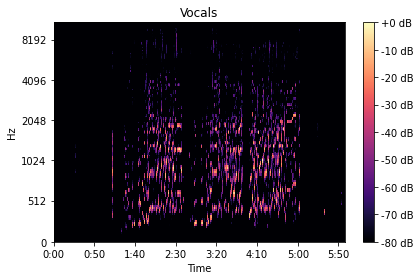

In [31]:
audio, sr_audio = librosa.load('./output/IU_GoodDay/vocals_mono')
sound, sr_sound = librosa.load('./output/IU_GoodDay/accompaniment.wav')
S_audio = librosa.feature.melspectrogram(audio, sr=sr_audio)
S_sound = librosa.feature.melspectrogram(sound, sr= sr_sound )
log_S_audio = librosa.amplitude_to_db(S_audio, ref=np.max)
log_S_sound = librosa.amplitude_to_db(S_sound, ref=np.max)
librosa.display.specshow(log_S_audio, sr=sr_audio, x_axis='time', y_axis='mel')
plt.title('Vocals')
plt.colorbar(format='%+2.0f dB')
plt.show()

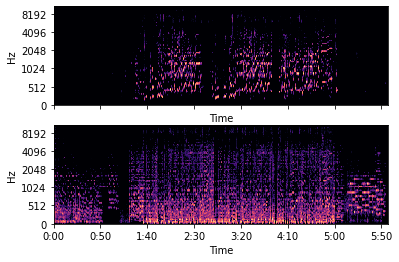

In [39]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(log_S_audio, sr=sr_audio, x_axis='time', y_axis='mel', ax=ax[0])
librosa.display.specshow(log_S_sound, sr=sr_, x_axis='time', y_axis='mel', ax=ax[1])
plt.colorbar(format='%+2.0f dB', ax=ax)
plt.show()

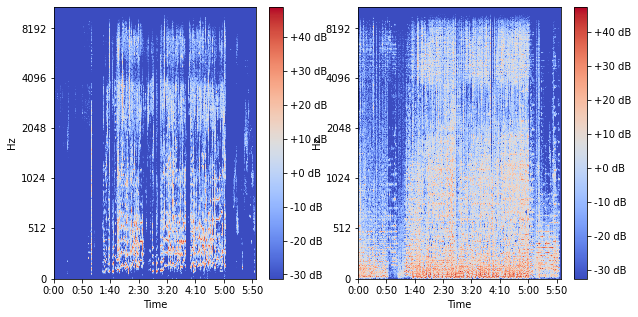

In [41]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = './output/IU_GoodDay/vocals_mono'
y, sr = librosa.load(audio_file)

# Compute spectrogram for audio file
n_fft = 2048
hop_length = 512
S_audio = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
log_S_audio = librosa.amplitude_to_db(np.abs(S_audio))

# Compute spectrogram for sound file
sound_file = './output/IU_GoodDay/accompaniment.wav'
y_sound, sr_audio = librosa.load(sound_file)
S_sound = librosa.stft(y_sound, n_fft=n_fft, hop_length=hop_length)
log_S_sound = librosa.amplitude_to_db(np.abs(S_sound))

# Plot spectrograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

img1 = librosa.display.specshow(log_S_audio, sr=sr, x_axis='time', y_axis='mel', ax=ax[0], cmap='coolwarm')
img2 = librosa.display.specshow(log_S_sound, sr=sr_audio, x_axis='time', y_axis='mel', ax=ax[1], cmap='coolwarm')

fig.colorbar(img1, ax=ax[0], format='%+2.0f dB')
fig.colorbar(img2, ax=ax[1], format='%+2.0f dB')

plt.show()


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

img1 = librosa.display.specshow(log_S_audio, sr=sr, x_axis='time', y_axis='mel', ax=ax[0])
img2 = librosa.display.specshow(log_S_sound, sr=sr_audio, x_axis='time', y_axis='mel', ax=ax[1])

ax[0].set_title('vocals')
ax[1].set_title('sounds')

plt.show()